In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_chrome = pd.read_csv('chrome_history.csv', header=None, names=['domain','Title', 'Time'])
df_edge = pd.read_csv('edge_history.csv', header=None, names=['domain','Title', 'Time'])

df = pd.concat([df_chrome, df_edge], ignore_index=True, sort=False)

df.shape

(1510, 3)

In [3]:
df.head()

,domain,Title,Time
0,https://www.google.com/,,2021-02-04 19:37:49
1,https://www.google.com/search?ei=apMcYIyrFLul5...,,2021-02-04 19:39:14
2,https://www.google.com/,,2021-02-04 19:41:40
3,https://www.google.com/,,2021-02-04 19:42:41
4,https://docs.anaconda.com/anaconda/install/win...,,2021-02-04 19:42:53


In [4]:
df.tail()

,domain,Title,Time
1505,https://www.w3schools.com/python/trypython.asp...,,2021-02-21 12:59:07
1506,https://docs.python.org/3/library/re.html,,2021-02-21 14:00:54
1507,https://www.bing.com/search?q=twinkle+twinkle+...,,2021-02-21 15:12:09
1508,https://my.umbc.edu/,,2021-02-21 16:29:26
1509,https://webauth.umbc.edu/umbcLogin?return_uri=...,,2021-02-21 16:29:34


In [5]:
df.dtypes

domain    object
Title     object
Time      object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

12

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

In [9]:
df['domain'].value_counts()[:50]

https://mail.google.com/mail/u/0/#inbox                                                                                                                                                                                                                                                                                                                                                   33
https://www.google.com/                                                                                                                                                                                                                                                                                                                                                                   19
https://webauth.umbc.edu/umbcLogin?return_uri=https%3A%2F%2Fwebauth.umbc.edu%2Fidp%2Fauthn%2Fwauthn.jsp%3Fconversation%3De1s1&Service=shib2-idp&Expires=60&reqexts=LogoutAppUri%25aHR0cHM6Ly93ZWJhdXRoLnVtYmMuZWR1L3NoaWJib2xldGgvdGlja2V0bG9n

<AxesSubplot:>

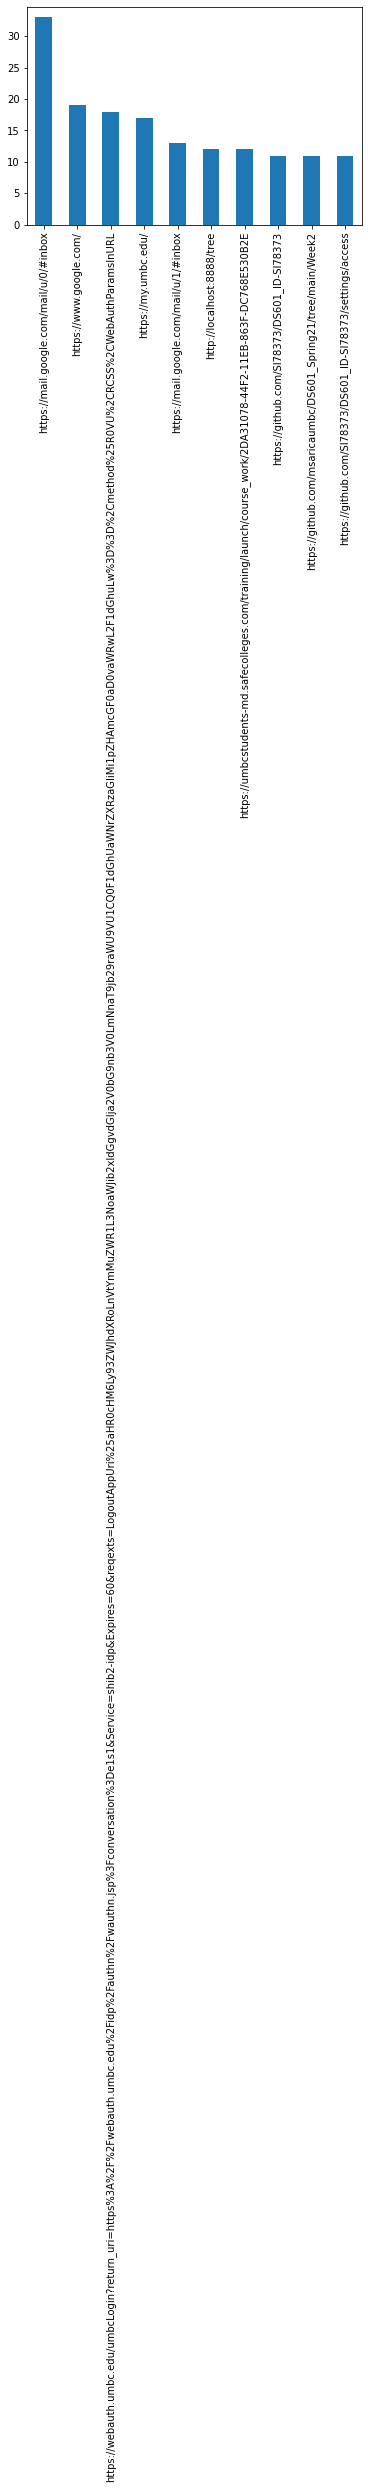

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      30
1      35
2      47
3      12
8      28
9      68
10     66
11     61
12    111
13     83
14     68
15     57
16    108
17    117
18    105
19    141
20    127
21     72
22     92
23     70
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

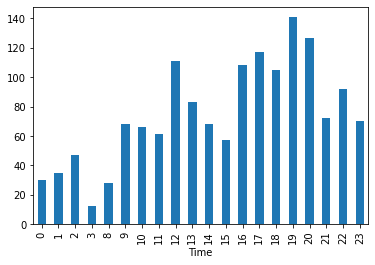

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,domain,Title,Time,Day,DayIndex
0,https://www.google.com/,,2021-02-04 19:37:49,Thursday,3
1,https://www.google.com/search?ei=apMcYIyrFLul5...,,2021-02-04 19:39:14,Thursday,3
2,https://www.google.com/,,2021-02-04 19:41:40,Thursday,3
3,https://www.google.com/,,2021-02-04 19:42:41,Thursday,3
4,https://docs.anaconda.com/anaconda/install/win...,,2021-02-04 19:42:53,Thursday,3


In [14]:
df['Day'].value_counts()

Wednesday    345
Thursday     258
Friday       250
Saturday     195
Monday       191
Tuesday      141
Sunday       118
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    191
1    141
2    345
3    258
4    250
5    195
6    118
Name: DayIndex, dtype: int64

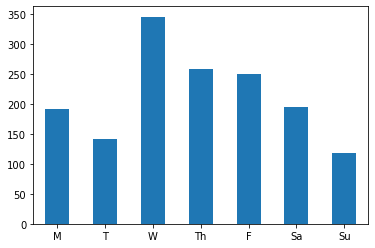

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa','Su'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,domain,Title,Time,Day,DayIndex,isWeekend
0,https://www.google.com/,,2021-02-04 19:37:49,Thursday,3,False
1,https://www.google.com/search?ei=apMcYIyrFLul5...,,2021-02-04 19:39:14,Thursday,3,False
2,https://www.google.com/,,2021-02-04 19:41:40,Thursday,3,False
3,https://www.google.com/,,2021-02-04 19:42:41,Thursday,3,False
4,https://docs.anaconda.com/anaconda/install/win...,,2021-02-04 19:42:53,Thursday,3,False


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [19]:
weekend.head()

,domain,Title,Time,Day,DayIndex,isWeekend
28,https://www.google.com/,,2021-02-06 01:18:19,Saturday,5,True
29,https://www.google.com/,,2021-02-06 01:25:20,Saturday,5,True
30,http://localhost:8888/notebooks/test1.ipynb,,2021-02-06 02:43:11,Saturday,5,True
31,https://github.com/msaricaumbc/DS601_Spring21/...,,2021-02-06 02:43:22,Saturday,5,True
32,https://www.google.com/,,2021-02-06 02:43:22,Saturday,5,True


In [20]:
weekday['domain'].value_counts()[:5]

https://mail.google.com/mail/u/0/#inbox                                                                                                                                                                                                                                                                                                                                       31
https://my.umbc.edu/                                                                                                                                                                                                                                                                                                                                                          15
https://www.google.com/                                                                                                                                                                                                                                               

In [21]:
weekend['domain'].value_counts()[:5]

https://www.duplichecker.com/                                                                                                                                                                                                                                                                                                                                                 7
https://webauth.umbc.edu/umbcLogin?return_uri=https%3A%2F%2Fwebauth.umbc.edu%2Fidp%2Fauthn%2Fwauthn.jsp%3Fconversation%3De1s1&Service=shib2-idp&Expires=60&reqexts=LogoutAppUri%25aHR0cHM6Ly93ZWJhdXRoLnVtYmMuZWR1L3NoaWJib2xldGgvdGlja2V0bG9nb3V0LmNnaT9jb29raWU9VU1CQ0F1dGhUaWNrZXRzaGliMi1pZHAmcGF0aD0vaWRwL2F1dGhuLw%3D%3D%2Cmethod%25R0VU%2CRCSS%2CWebAuthParamsInURL    6
https://github.com/SI78373/DS601_ID-SI78373                                                                                                                                                                                                                             

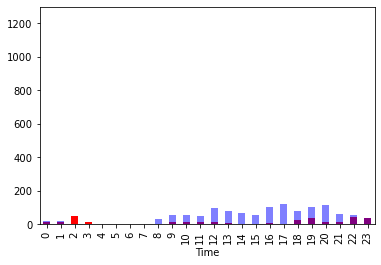

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

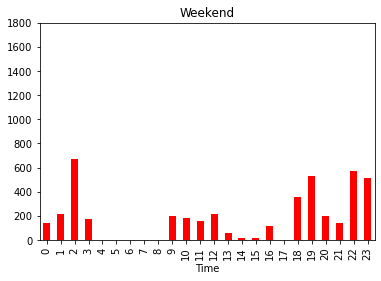

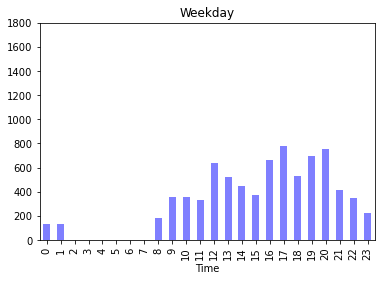

In [24]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [25]:
df['domain'].value_counts()[:50]

https://mail.google.com/mail/u/0/#inbox                                                                                                                                                                                                                                                                                                                                                   33
https://www.google.com/                                                                                                                                                                                                                                                                                                                                                                   19
https://webauth.umbc.edu/umbcLogin?return_uri=https%3A%2F%2Fwebauth.umbc.edu%2Fidp%2Fauthn%2Fwauthn.jsp%3Fconversation%3De1s1&Service=shib2-idp&Expires=60&reqexts=LogoutAppUri%25aHR0cHM6Ly93ZWJhdXRoLnVtYmMuZWR1L3NoaWJib2xldGgvdGlja2V0bG9n

In [26]:
df['domain'] = df['domain'].astype(str)

In [27]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

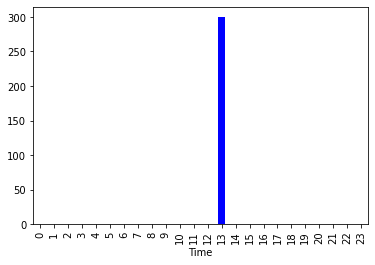

In [28]:
_= show_domain_stats('facebook', 'blue')

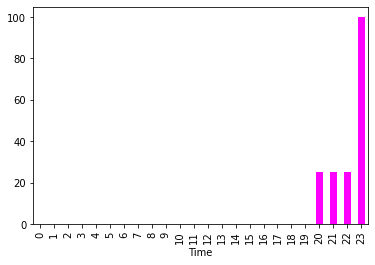

In [29]:
_ = show_domain_stats('stackover', 'magenta')

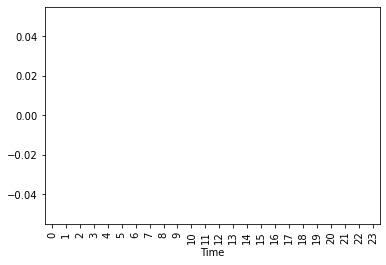

In [30]:
_ = show_domain_stats('netflix', 'red')

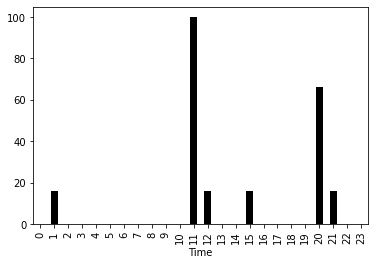

In [31]:
_=show_domain_stats('amazon', 'black')

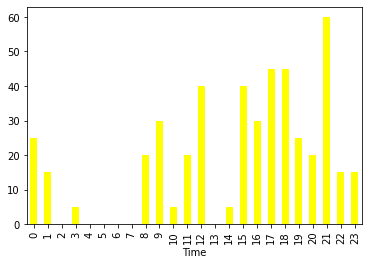

In [32]:
_=show_domain_stats('blackboard', 'yellow')

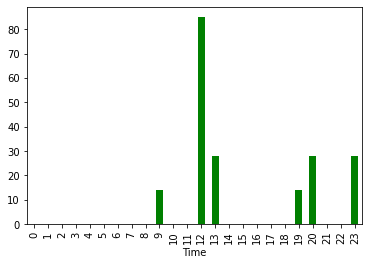

In [33]:
_=show_domain_stats('youtube', 'green')

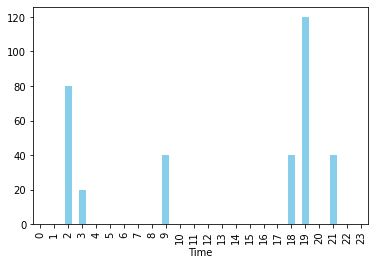

In [34]:
_=show_domain_stats('researchgate', 'skyblue')

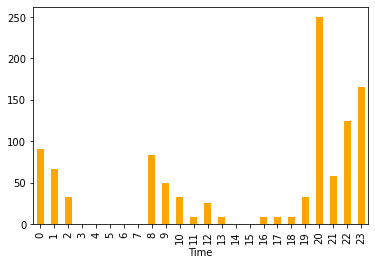

In [35]:
_=show_domain_stats('github', 'orange')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

### Do you give permission for another student to analyze your `history_cleaned.csv`? 

(Your name will stay confidencial)

Yes

### What do you think about this assignment? ( 3 sentences at most! ) 

answer here

This was an interesting HW and I learned how to clean and analyze data. 